# Actividad 1:
# Modelado de Regresión Lineal con Álgebra Matricial en Python

Estructura (debido a que el codigo no es extenso, se optó por dejar todo en un mismo bloque de codigo en vez de seccionarlo por cada función):
1. Generación de datos sintéticos.
2. Ajuste del modelo de regresión lineal con álgebra matricial.
3. Visualización de resultados.

Decisiones de diseño:
- Se emplea np.random para generar datos sintéticos reproducibles (semilla fija).
- Se usa álgebra matricial explícita para mostrar cómo se resuelve una regresión lineal sin depender de librerías externas como sklearn.
- Se aplica np.linalg.pinv (pseudo-inversa) en lugar de la inversa directa para garantizar estabilidad numérica incluso si la matriz no es invertible.
- El modelo se grafica con matplotlib, incluyendo predicciones y visualización clara del ajuste.

---

 ### Fundamentos Matemáticos:
Este proyecto implementa una **regresión lineal simple** utilizando **álgebra matricial** con `NumPy`, una de las bibliotecas fundamentales para computación numérica en Python.

### ¿Cómo se aplica el álgebra matricial?
La regresión lineal busca ajustar una recta a un conjunto de datos de la forma:
- `y = β₀ + β₁x + ε`

Esto se puede representar en forma matricial como:
- `y = X · β + ε`

Donde:

- `X` es la **matriz de diseño** (una columna de unos y una columna con los valores de `x`),
- `β` es el **vector de parámetros** (`β₀`: intercepto, `β₁`: pendiente),
- `y` es el **vector de resultados observados**.

El modelo se ajusta minimizando el error cuadrático medio mediante la fórmula:
`β̂ = (Xᵗ · X)⁻¹ · Xᵗ · y`

Esta solución se deriva directamente del cálculo matricial y permite encontrar los coeficientes óptimos para la línea que mejor se ajusta a los datos.

---

### ¿Por qué es fundamental en Machine Learning?

La regresión lineal con álgebra matricial es **una base esencial de muchos algoritmos en Machine Learning**, porque:

- Permite representar modelos de forma **vectorizada y eficiente**.
- Es la base matemática de algoritmos más complejos como **regresión logística, redes neuronales** y **máquinas de soporte vectorial (SVM)**.
- Facilita el entrenamiento con grandes volúmenes de datos usando operaciones matriciales optimizadas.

Comprender esta técnica permite entender cómo **aprenden los modelos supervisados** y cómo ajustan sus parámetros a partir de los datos.

---

x shape: (100, 1), y shape: (100, 1)
X shape: (100, 2)
X.T shape: (2, 100)
X.T @ X shape: (2, 2)
X.T @ y shape: (2, 1)
beta shape: (2, 1)
Parámetros estimados: intercepto = 4.2151, pendiente = 2.5402


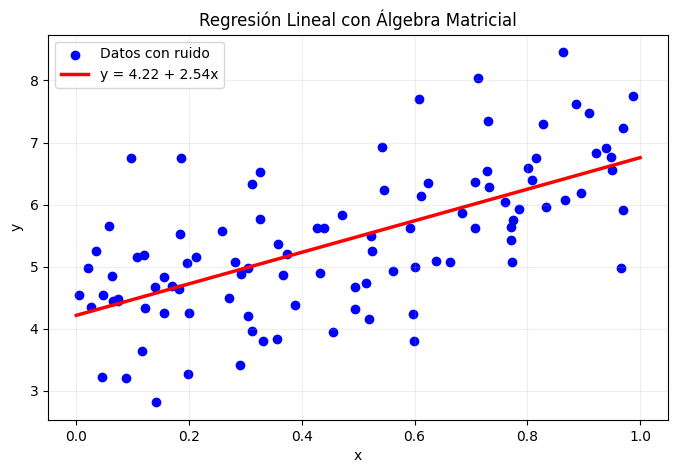

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generar_datos(n=100):
    """
    Genera datos sintéticos para la regresión lineal simple.

    Args:
        n (int): Número de datos a generar.

    Returns:
        x: Variable independiente de forma (n, 1).
        y: Variable dependiente con relación lineal y ruido gaussiano, forma (n, 1).
    """
    np.random.seed(42)  # Semilla para reproducibilidad
    x = np.random.rand(n, 1)
    y = 4 + 3 * x + np.random.randn(n, 1)  # Relación lineal con ruido
    print(f"x shape: {x.shape}, y shape: {y.shape}")
    return x, y


def ajustar_modelo(x, y):
    """
    Ajusta el modelo de regresión lineal usando álgebra matricial.

    Args:
        x: Variable independiente de forma (n, 1).
        y: Variable dependiente de forma (n, 1).

    Returns:
        beta: Vector de parámetros ajustados (intercepto y pendiente), forma (2, 1).
    """
    # Validación de dimensiones
    assert x.shape == y.shape, "x e y deben tener la misma forma"
    assert x.ndim == 2 and y.ndim == 2, "Los arrays deben ser bidimensionales"
    assert x.shape[1] == 1, "x debe tener una sola columna"

    n = x.shape[0]
    # Matriz de diseño: columna de unos (intercepto) + columna de características
    X = np.hstack([np.ones((n, 1)), x])
    print(f"X shape: {X.shape}")

    # Cálculo paso a paso con operaciones matriciales
    XT = X.T
    print(f"X.T shape: {XT.shape}")

    XTX = XT @ X
    print(f"X.T @ X shape: {XTX.shape}")
    
    XTy = XT @ y
    print(f"X.T @ y shape: {XTy.shape}")

    # Resolviendo la ecuación 
    beta = np.linalg.pinv(XTX) @ XTy
    
    print(f"beta shape: {beta.shape}")
    print(f"Parámetros estimados: intercepto = {beta[0][0]:.4f}, pendiente = {beta[1][0]:.4f}")
    return beta


def graficar_resultado(x, y, beta):
    """
    Grafica los datos originales y la recta ajustada por el modelo.

    Args:
        x: Variable independiente de forma (n, 1).
        y: Variable dependiente de forma (n, 1).
        beta: Vector de parámetros ajustados (2, 1).
    """
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, color='blue', label='Datos con ruido')
    
    # Predicción de valores usando el modelo ajustado
    x_line = np.linspace(0, 1, 100).reshape(-1, 1)
    X_line = np.hstack([np.ones((100, 1)), x_line])
    y_pred = X_line @ beta
    
    # Mostrar ecuación en el título
    plt.plot(x_line, y_pred, color='red', linewidth=2.5, 
             label=f'y = {beta[0][0]:.2f} + {beta[1][0]:.2f}x')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Regresión Lineal con Álgebra Matricial')
    plt.grid(alpha=0.2)
    plt.legend()
    plt.show()


# Visualizacion de la solución de regresión lineal simple
# Generar datos sintéticos
x, y = generar_datos(n=100)

# Ajustar el modelo de regresión lineal
beta = ajustar_modelo(x, y)

# Graficar resultados
graficar_resultado(x, y, beta)